<a href="https://colab.research.google.com/github/rmtkazizi/rahmatikaazizi.github.io/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis Data Eksploratif

Data E-Commerce Sales Dataset (kaggel.com)
1. Customer Details, mencakup 20.000 data pelanggan (customer_id, sex, customer_age, tenure)
2. Basket Details, mencakup 15.000 data transaksi keranjang (customer_id, product_id, basket_date, basket_count)
(https://www.kaggle.com/berkayalan/ecommerce-sales-dataset)

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
customer = pd.read_csv('/content/drive/MyDrive/Project/DATA PROJECT PORTOFOLIO/Project 1a_customer_details.csv')

In [ ]:
basket = pd.read_csv('/content/drive/MyDrive/Project/DATA PROJECT PORTOFOLIO/Project 1b_basket_details.csv')

# Cuplikan Data

In [ ]:
# 5 baris teratas dari data customer
customer.head()

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88


In [ ]:
# informasi general tentang dataset customer
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   20000 non-null  int64  
 1   sex           20000 non-null  object 
 2   customer_age  20000 non-null  float64
 3   tenure        20000 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 625.1+ KB


In [ ]:
customer.describe()

,customer_id,customer_age,tenure
count,2.000000e+04,20000.000000,20000.000000
mean,1.760040e+07,262.222550,44.396800
std,8.679505e+06,604.321589,31.998376
min,2.093000e+03,-34.000000,4.000000
25%,1.188115e+07,29.000000,21.000000
50%,1.560912e+07,38.000000,35.000000
75%,2.228484e+07,123.000000,60.000000
max,4.462566e+07,2022.000000,133.000000


Pada cuplikan data diatas dapat dilihat banyak data, rata-rata, standar deviasi, nilai minimum dan maksimum, serta nilai kuartil 1, 2, dan 3 dari dataset customer

In [ ]:
# 5 baris teratas dari data basket
basket.head()

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2


In [ ]:
# informasi general tentang dataframe basket
basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   15000 non-null  int64 
 1   product_id    15000 non-null  int64 
 2   basket_date   15000 non-null  object
 3   basket_count  15000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 468.9+ KB


In [ ]:
basket.describe()

,customer_id,product_id,basket_count
count,1.500000e+04,1.500000e+04,15000.000000
mean,1.808567e+07,3.269771e+07,2.153733
std,1.233000e+07,1.629455e+07,0.517929
min,4.784000e+03,4.939000e+04,2.000000
25%,8.659327e+06,3.137412e+07,2.000000
50%,1.520775e+07,3.694759e+07,2.000000
75%,2.663904e+07,4.502408e+07,2.000000
max,4.460824e+07,5.579097e+07,10.000000


Pada cuplikan data diatas dapat dilihat banyak data, rata-rata, standar deviasi, nilai minimum dan maksimum, serta nilai kuartil 1, 2, dan 3 dari dataset basket

## Data Preprocessing

##handling missing data

In [ ]:
# jumlah entry NULL di setiap kolom
customer.isna().sum()

customer_id     0
sex             0
customer_age    0
tenure          0
dtype: int64

In [ ]:
# jumlah entry NULL di setiap kolom
basket.isna().sum()

customer_id     0
product_id      0
basket_date     0
basket_count    0
dtype: int64

Tidak ada missing value untuk kedua dataset

##handling duplicate data

In [ ]:
# cek jumlah duplicate rows dari semua rows
customer.duplicated().sum()

0

In [ ]:
# cek jumlah duplicate rows dari semua rows
basket.duplicated().sum()

0

Tidak ada data duplicate untuk masing-masing dataset

# Analisis Eksploratif Data (Customer Dataset)

In [ ]:
#Periksa kategori apa saja yang ada pada kolom sex
customer.sex.unique()

array(['Male', 'Female', 'kvkktalepsilindi', 'UNKNOWN'], dtype=object)

In [ ]:
basket.hari.unique()

array([2, 1, 0, 6, 5, 4, 3])

In [ ]:
len(basket.hari)

15000

In [ ]:
#Periksa pada objek berapa yang memiliki kategori 'UNKNOWN'
customer.index[customer['sex']=='UNKNOWN'].tolist()

[3597]

In [ ]:
#Periksa pada objek berapa yang memiliki kategori 'kvkktalepsilindi'
customer.index[customer['sex']=='kvkktalepsilindi'].tolist()

[1201, 6133, 6443, 8481, 9283, 10035, 11102, 19785]

In [ ]:
#Drop objek yang memiliki kategori selain Male dan Female
customer1= customer.drop([customer.index[1201], customer.index[6133],customer.index[6443], customer.index[8481],customer.index[9283], customer.index[10035],customer.index[11102], customer.index[19785],customer.index[3597]])
customer1

,customer_id,sex,customer_age,tenure
0,9798859,Male,44.0,93
1,11413563,Male,36.0,65
2,818195,Male,35.0,129
3,12049009,Male,33.0,58
4,10083045,Male,42.0,88
...,...,...,...,...
19995,12557307,Male,41.0,52
19996,12595961,Male,29.0,52
19997,12520991,Male,35.0,52
19998,12612719,Male,39.0,52


In [ ]:
#Cek kembali kategori apa saja yang ada pada kolom sex
customer1.sex.unique()

array(['Male', 'Female'], dtype=object)

Setelah kolom sex dibersihkan dari kategori selain gender, maka customer yang tersisa ada sebanyak 19991 customer.

In [ ]:
#melihat jumlah customer berdasarkan jenis kelamin
gender=customer1.groupby('sex').count()
gender

,customer_id,customer_age,tenure
sex,,,
Female,4669,4669,4669
Male,15322,15322,15322


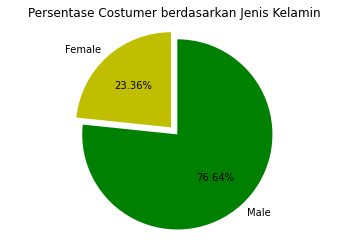

In [ ]:
#Visual perbandingan jenis kelamin costumer
import matplotlib.pyplot as plt

labels = 'Female', 'Male'
sections = [4669, 15322]
colors = ['y', 'g']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Persentase Costumer berdasarkan Jenis Kelamin')
plt.show()

Costumer didominasi oleh jenis kelamin laki-laki sebanyak 76%

In [ ]:
#Kelompokkan data berdasarkan usia untuk melihat sebaran penjualan sesuai usianya
age = pd.pivot_table(data=customer, index=['customer_age'],values='customer_id', aggfunc=['count'])
age

,count
,customer_id
customer_age,
-34.0,1
3.0,2
4.0,1
5.0,710
6.0,1
...,...
127.0,1
130.0,1


In [ ]:
#Periksa dan drop jika terdapat outlier pada usia
from scipy import stats
import numpy as np
z_scores = stats.zscore(age)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
ages = age[filtered_entries]

print(ages)

                   count
             customer_id
customer_age            
-34.0                  1
 3.0                   2
 4.0                   1
 5.0                 710
 6.0                   1
...                  ...
 124.0                 5
 127.0                 1
 130.0                 1
 139.0                 1
 149.0                 1

[91 rows x 1 columns]


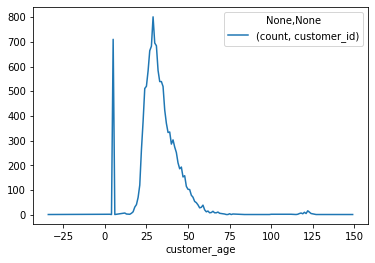

In [ ]:
ages.plot()

Kontribusi terbesar datang dari customer dengan kelompok usia 25 sampai 50 tahun 

In [ ]:
#Total enure customer berdasarkan gender
tenure=customer1.groupby('sex')['tenure'].sum()
tenure

sex
Female    175260
Male      712325
Name: tenure, dtype: int64

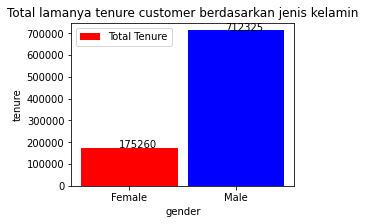

In [ ]:
#Visualization
import matplotlib.pyplot as plt
plt.figure(figsize = (4,3))
gender = ['Female', 'Male']

tenure = [175260, 712325]
plt.bar(gender, tenure, width= 0.9, align='center', color=['r', 'b'])
i = 1.0
j = 0
for i in range(len(gender)):
    plt.annotate(tenure[i], (-0.1 + i, tenure[i] + j))

plt.legend(labels = ['Total Tenure'])
plt.title("Total lamanya tenure customer berdasarkan jenis kelamin")
plt.xlabel('gender')
plt.ylabel('tenure')
plt.show()

Berdasarkan bar chart diatas dapat dilihat customer dengan jenis kelamin laki-laki cenderung memiliki total waktu tenure yang lebih lama dibandingkan total waktu tenure customer perempuan.

# Analisis Data Eksploratif (Basket Dataset)

In [ ]:
#Melihat jumlah penjualan berdasarkan waktu (dataset basket)
penjualan = basket.groupby('basket_date')['customer_id'].count()
penjualan

basket_date
2019-05-20     518
2019-05-21     457
2019-05-22     276
2019-05-23     275
2019-05-24     611
2019-05-25    1162
2019-05-26    1578
2019-05-27    1617
2019-05-28    1213
2019-05-29     464
2019-05-30     346
2019-05-31     379
2019-06-01     298
2019-06-02     270
2019-06-03     293
2019-06-04     289
2019-06-05     205
2019-06-06     187
2019-06-07     285
2019-06-08     348
2019-06-09     508
2019-06-10     474
2019-06-11     428
2019-06-12     289
2019-06-13     215
2019-06-14     392
2019-06-15     399
2019-06-16     371
2019-06-17     273
2019-06-18     345
2019-06-19     235
Name: customer_id, dtype: int64

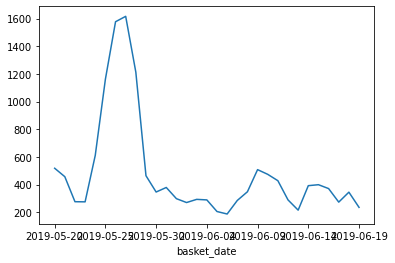

In [ ]:
#Visualisasi trend jumlah penjualan berdasarkan waktu (dataset basket)
penjualan.plot()

1. Terjadi peningkatan penjualan yang sangat besar pada tanggal 25 mei dibanding hari sebelumnya
2. Hari dengan jumlah penjualan yang sangat besar terjadi pada tanggal 25 mei s/d 28 mei
3. 27 mei 2019, merupakan hari dengan jumlah penjualan terbanyak
4. Jumlah penjualan paling sedikit terjadi pada tanggal 06/06/2019,

In [ ]:
#Melihat produk yang banyak diminati, kelompokan data berdasarkan product id 
produk = basket.groupby('product_id').count()
produk1 = produk.sort_values(["customer_id"], ascending=False)
produk1

,customer_id,basket_date,basket_count
product_id,,,
43524799,32,32,32
31516269,25,25,25
39833031,24,24,24
46130148,17,17,17
40276011,12,12,12
...,...,...,...
33321392,1,1,1
33324373,1,1,1
33325533,1,1,1


1. Terdapat 13161 jenis produk berdasarkan produk.id, 
2. Produk yang paling diminati adalah produk dengan id 43524799, sebanyak 32 produk

# Perkiraan Banyaknya Customer yang Berbelanja (berdasarkan hari)

In [ ]:
from pandas import to_datetime
basket['basket_date'] = to_datetime(basket['basket_date'], errors='coerce')
basket

,customer_id,product_id,basket_date,basket_count
0,42366585,41475073,2019-06-19,2
1,35956841,43279538,2019-06-19,2
2,26139578,31715598,2019-06-19,3
3,3262253,47880260,2019-06-19,2
4,20056678,44747002,2019-06-19,2
...,...,...,...,...
14995,8336862,50977318,2019-05-26,2
14996,9500785,43862061,2019-05-26,2
14997,22787344,6041664,2019-05-26,2
14998,8221263,3597369,2019-05-26,2


In [ ]:
basket['hari'] = basket['basket_date'].dt.dayofweek
basket['weekend'] = 0
baskets= (basket['hari']==5) | (basket['hari']==6)
basket['weekend'] = 0
basket.loc[baskets, 'weekend'] = 1
basket

,customer_id,product_id,basket_date,basket_count,hari,weekend
0,42366585,41475073,2019-06-19,2,2,0
1,35956841,43279538,2019-06-19,2,2,0
2,26139578,31715598,2019-06-19,3,2,0
3,3262253,47880260,2019-06-19,2,2,0
4,20056678,44747002,2019-06-19,2,2,0
...,...,...,...,...,...,...
14995,8336862,50977318,2019-05-26,2,6,1
14996,9500785,43862061,2019-05-26,2,6,1
14997,22787344,6041664,2019-05-26,2,6,1
14998,8221263,3597369,2019-05-26,2,6,1


In [ ]:
from pandas import crosstab
crosstab(basket['hari'], basket['weekend'])

weekend,0,1
hari,,
0,3175,0
1,2732,0
2,1469,0
3,1023,0
4,1667,0
5,0,2207
6,0,2727


In [ ]:
from pandas import Series
dalam_seminggu = Series(basket['customer_id'][basket['weekend']==0].unique()) 
di_akhir_pekan = Series(basket['customer_id'][basket['weekend']==1].unique())
bask = di_akhir_pekan.isin(dalam_seminggu)
ecom_pekan= di_akhir_pekan[~bask]

In [ ]:
basket['ecom_pekan'] = 0
ecom_basket = basket['customer_id'].isin(ecom_pekan)
basket.loc[ecom_basket, 'ecom_pekan'] = 1
basket

,customer_id,product_id,basket_date,basket_count,hari,weekend,ecom_pekan
0,42366585,41475073,2019-06-19,2,2,0,0
1,35956841,43279538,2019-06-19,2,2,0,0
2,26139578,31715598,2019-06-19,3,2,0,0
3,3262253,47880260,2019-06-19,2,2,0,0
4,20056678,44747002,2019-06-19,2,2,0,0
...,...,...,...,...,...,...,...
14995,8336862,50977318,2019-05-26,2,6,1,1
14996,9500785,43862061,2019-05-26,2,6,1,1
14997,22787344,6041664,2019-05-26,2,6,1,1
14998,8221263,3597369,2019-05-26,2,6,1,0


 Gabungkan Kedua Dataset Basket dan Customer

In [ ]:
ecomers = basket.merge(customer, on='customer_id')
ecomers

,customer_id,product_id,basket_date,basket_count,hari,weekend,ecom_pekan,sex,customer_age,tenure
0,4897641,34525548,2019-06-15,2,5,1,1,Male,40.0,114
1,11623549,50394038,2019-06-18,2,1,0,0,Male,30.0,63
2,11665521,41476812,2019-06-15,2,5,1,1,Female,51.0,62
3,4193819,6455162,2019-06-15,2,5,1,1,Male,42.0,117
4,1030589,38578121,2019-05-26,2,6,1,1,Male,45.0,127
...,...,...,...,...,...,...,...,...,...,...
67,12574807,32056122,2019-05-25,2,5,1,1,Male,33.0,52
68,15192667,31272089,2019-05-24,2,4,0,0,Male,46.0,37
69,14248059,48790153,2019-05-21,2,1,0,0,Male,29.0,41
70,10629563,47864502,2019-06-01,2,5,1,1,Male,29.0,76


Setelah digabungkan, ternyata data customer dan basket hanya tersedia 72 interaksi. Sulit untuk menganalisis karakteristik customer, karena data yang tersisa sangat jauh lebih sedikit dibandingkan data awal. 
Maka, saya  melanjutkan melakukan analisis menggunakan data awal sebelum digabungkan

In [ ]:
basketweek=basket.groupby(['weekend'])['basket_count'].sum()
basketweek

weekend
0    21762
1    10544
Name: basket_count, dtype: int64

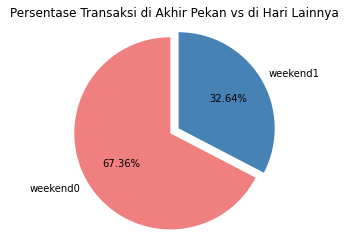

In [ ]:
#Visualization
import matplotlib.pyplot as plt

Weekend = ['weekend0', 'weekend1']
Customer = [21762, 10544]
colors = ['lightcoral','steelblue']
plt.pie(Customer, labels=Weekend, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')
plt.axis('equal')
plt.title('Persentase Transaksi di Akhir Pekan vs di Hari Lainnya')
plt.show()

Berdasarkan pie chart diatas, dapat dilihat bahwa jumlah transaksi yang hanya dilakukan di akhir pekan lebih sedikit dibanding jumlah transaksi di hari lainnya.

In [ ]:
basketday=basket.groupby(['hari'])['basket_count'].sum()
basketday

hari
0    6840
1    5948
2    3214
3    2242
4    3518
5    4712
6    5832
Name: basket_count, dtype: int64

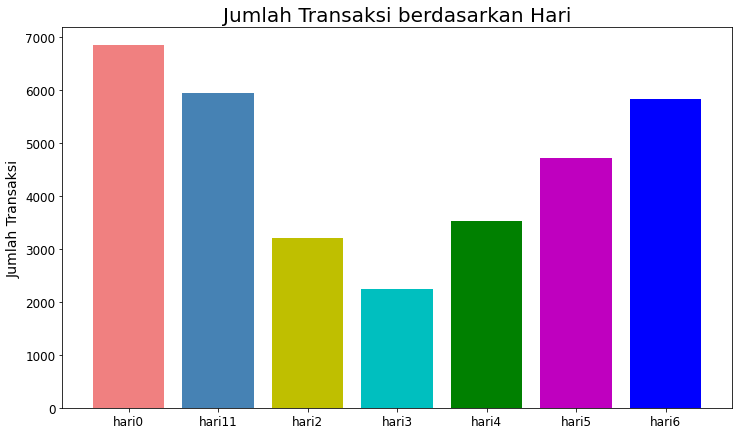

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
Day = ['hari0', 'hari11', 'hari2', 'hari3', 'hari4', 'hari5', 'hari6']
Basket = [6840, 5948, 3214, 2242, 3518, 4712, 5832]
plt.figure(figsize=(12,7))
plt.bar(Day, Basket, color=['lightcoral','steelblue', 'y', 'c', 'g', 'm', 'b'])
plt.title('Jumlah Transaksi berdasarkan Hari', size=20)
plt.ylabel('Jumlah Transaksi', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Berdasarkan bar chart diatas dapat dilihat dalam sebulan ditiap minggunya, hari0 merupakan hari dengan jumlah transaksi terbanyak, dan hari 3 merupakan hari dengan penjualan paling sedikit.

# CONCLUSION & ANALYTICS APPROACH

# Conclusion
Berdasarkan hasil analisis Project 1A menggunakan dataset customer dapat disimpulkan:
1. Costumer didominasi oleh jenis kelamin laki-laki sebanyak 76%, dimana customer laki-laki memiliki transaksi keranjang yang lebih banyak dan waktu tenor yang lebih lama, dan juga customer dari kelompok usia 25 sampai 50 tahun. Sehingga seller mengetahui target pasar mereka, yaitu customer dengan jenis kelamin laki-laki, serta customer dengan kelompok usia 25 sampai 50 tahun.
2. Terjadi peningkatan penjualan yang sangat besar pada tanggal 25 mei s/d 28 mei, dimana 27 mei 2019 merupakan hari dengan jumlah penjualan terbanyak
3. Jumlah penjualan paling sedikit terjadi pada tanggal 06 juni 2019
4. Terdapat 13161 jenis produk berdasarkan produk.id, dimana produk yang paling diminati adalah produk dengan id 43524799, sebanyak 32 produk
5. Transaksi yang dilakukan hanya di akhir pekan tidak lebih banyak dibandingkan transaksi di hari lainnya. Dimana hari0 merupakan hari dengan transaksi terbanyak.

# Analystics Approach
1. Diagnostic Analytics
-  Hal ini bisa saja terjadi karena produk yang disediakan oleh ecommerce merupakan produk yang lebih disukai oleh customer laki-laki dan customer dengan kelompok usia 25 sampai dengan 50 tahun.
- Adanya promo besar-besaran pada tanggal 25 mei s/d 28 mei
- Adanya customer baru yang masih bingung menggunakan ecommerce pada tanggal 06 juni 2019.
- Produk yang diminati bisa saja sedang sangat dibutuhkan oleh para customer pada saat itu, atau bisa juga terjadi karena promo atau harga yang lebih terjangkau.
- Hari0 yang memiliki transaksi terbanyak bisa juga terjadi karena adanya promo mingguan

2. Predictive Analytics
- Mengembangkan sistem untuk memprediksi barang apa yang dibutuhkan oleh customer dan sitem untuk memprediksi respon customer jika diberikan promo.

3. Prescriptive Analytics
- Sebaiknya seller menyediakan barang yang sesuai dengan customer dengan konstribusi terbesar, yaitu customer dengan kelompok usia 25 sampai 50 tahun.
- Ada baaiknya juga seller menyediakan barang yang menarik perhatian customer perempuan.
- Menyediakan produk yang banyak diminati oleh customer
- Mempromosikan kelebihan produk yang kurang diminati customer